# Case Study Final Report
## Introduction
### Organized and Detailed Summary of Milestones 1- 4
#### The first few sections were part of the milestone 1 - 4

In [3]:
# Importing the relevant packages to start the model building
# Other pakages are imported in the relevant code modules
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [4]:
# This dataset contains the topics already marked and so I would like to use this as training set for my model.


filename = "~/Documents/mygithub/bu_dsc/data/external/News_Category_Dataset_v2.json"

data = pd.read_json(filename, lines = True)
#display the first few rows of data
data.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


## Business Problem/Data

In [5]:
'''
Data Description
The data consists of a collection of news where each news entry is represented by the following columns:

category: Category of the news (string)
headline: Headline of the news (string)
author: Authors and Contributors or Associations (string)
short_description: Short description of the news' content (string)
date: Date of the published news. (date)
The goal is to classify the news category given only the headline. An accuracy of 90% on the test set is aimed.
'''

"\nData Description\nThe data consists of a collection of news where each news entry is represented by the following columns:\n\ncategory: Category of the news (string)\nheadline: Headline of the news (string)\nauthor: Authors and Contributors or Associations (string)\nshort_description: Short description of the news' content (string)\ndate: Date of the published news. (date)\nThe goal is to classify the news category given only the headline. An accuracy of 90% on the test set is aimed.\n"

In [6]:
# Inspecting the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


In [13]:
# Checking the unique elements
print(data.nunique())
print('\n')
print("Initial data shows that there were 41 categories for the news articles")

category                 41
headline             199344
authors               27993
link                 200812
short_description    178353
date                   2309
dtype: int64


Initial data shows that there were 41 categories for the news articles


In [15]:
# Checking the unique elements
# Dropping duplicates by headline
data.drop_duplicates('headline',keep = False, inplace = True)

data.nunique()
print('Unique category: ', data.category.unique())
data.nunique()

Unique category:  ['CRIME' 'ENTERTAINMENT' 'WORLD NEWS' 'IMPACT' 'POLITICS' 'WEIRD NEWS'
 'BLACK VOICES' 'WOMEN' 'COMEDY' 'QUEER VOICES' 'SPORTS' 'BUSINESS'
 'TRAVEL' 'MEDIA' 'TECH' 'RELIGION' 'SCIENCE' 'LATINO VOICES' 'EDUCATION'
 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS' 'WORLDPOST' 'FIFTY' 'ARTS'
 'WELLNESS' 'PARENTING' 'HOME & LIVING' 'STYLE & BEAUTY' 'DIVORCE'
 'WEDDINGS' 'FOOD & DRINK' 'MONEY' 'ENVIRONMENT' 'CULTURE & ARTS']


category                 41
headline             198627
authors               27893
link                 198608
short_description    176714
date                   2309
dtype: int64

## Dimensionality & Feature Reduction and Feature Engineering

In [17]:
# Note thate there is the category THE WORLDPOST and WORLDPOST. It is the same category, so it needs to be substituted.
# Regrouping some of the other categories in order to reduce output features that are very closely related

data.category = data.category.map(lambda x: "POLITICS & NEWS" if x in ["THE WORLDPOST","WORLDPOST","POLITICS","WORLD NEWS"] else x)
data.category = data.category.map(lambda x: "MISCELLANEOUS" if x in ["GOOD NEWS","FIFTY","WEIRD NEWS"] else x)
data.category = data.category.map(lambda x: "ARTS" if x in ["ARTS & CULTURE","CULTURE & ARTS"] else x)
data.category = data.category.map(lambda x: "GROUPS VOICES" if x in ["QUEER VOICES","BLACK VOICES","LATINO VOICES"] else x)
data.category = data.category.map(lambda x: "EDUCATION" if x == "COLLEGE" else x)
data.category = data.category.map(lambda x: "PARENTING" if x == "PARENTS" else x)
data.category = data.category.map(lambda x: "BUSINESS & FINANCES" if x in ["MONEY","BUSINESS"] else x)
data.category = data.category.map(lambda x: "SCIENCE & TECH" if x in ["TECH","SCIENCE"] else x)
data.category = data.category.map(lambda x: "STYLE & BEAUTY" if x in ["STYLE"] else x)
data.category = data.category.map(lambda x: "ENVIRONMENT" if x in ["GREEN"] else x)
data.category = data.category.map(lambda x: "FOOD & DRINK" if x in ["TASTE"] else x)
data.category = data.category.map(lambda x: "HEALTHY LIVING" if x in ["WELLNESS","HOME & LIVING"] else x)


data.nunique()

category                 23
headline             198627
authors               27893
link                 198608
short_description    176714
date                   2309
dtype: int64

In [18]:
# Printing out the new categories
# The category count is now showing 35
print('Unique category: ', data.category.unique())
print(data.nunique())
print("After merging the data shows that there were 23 categories for the news articles")

Unique category:  ['CRIME' 'ENTERTAINMENT' 'POLITICS & NEWS' 'IMPACT' 'MISCELLANEOUS'
 'GROUPS VOICES' 'WOMEN' 'COMEDY' 'SPORTS' 'BUSINESS & FINANCES' 'TRAVEL'
 'MEDIA' 'SCIENCE & TECH' 'RELIGION' 'EDUCATION' 'PARENTING' 'ARTS'
 'STYLE & BEAUTY' 'ENVIRONMENT' 'FOOD & DRINK' 'HEALTHY LIVING' 'DIVORCE'
 'WEDDINGS']
category                 23
headline             198627
authors               27893
link                 198608
short_description    176714
date                   2309
dtype: int64
After merging the data shows that there were 23 categories for the news articles


In [19]:
# This shows that after merging the categories the count stays the same overall
# In fact it is just a regrouping of the categories and make those easier to predict
# Sorting the above grouped data by count of the headline in descending order

data.groupby('category')['headline'].count().sort_values(ascending=False)

category
POLITICS & NEWS        40976
HEALTHY LIVING         28441
ENTERTAINMENT          16020
PARENTING              12470
GROUPS VOICES          11932
STYLE & BEAUTY         11033
TRAVEL                  9834
FOOD & DRINK            8300
BUSINESS & FINANCES     7608
MISCELLANEOUS           5467
COMEDY                  5100
SPORTS                  4880
SCIENCE & TECH          4192
ENVIRONMENT             3856
ARTS                    3830
WEDDINGS                3584
IMPACT                  3440
DIVORCE                 3411
CRIME                   3395
WOMEN                   3359
MEDIA                   2810
RELIGION                2543
EDUCATION               2146
Name: headline, dtype: int64

In [20]:
# Looking at the feature author as that could have a very significant effect on the outcome
# Usually reporters do reporting on specific topics more often
print('Unique Author Names: ', data.authors.unique())

Unique Author Names:  ['Melissa Jeltsen' 'Andy McDonald' 'Ron Dicker' ...
 'Courtney Garcia, Contributor\nI tell stories and drink wine.'
 'Mateo Gutierrez, Contributor\nArtist'
 'John Giacobbi, Contributor\nTales from the Interweb by The Web Sheriff']


In [21]:
author_names = data.authors.unique()

In [22]:
author_list = author_names.tolist()
author_list

ic',
 'Kanupriya Kapoor, Reuters',
 'Hideyuki Sano, Reuters',
 'Pei Li, Adam Jourdan, Reuters',
 "Lydia O'Connor and Willa Frej",
 'Peter Martell, On assignment for HuffPost',
 'Sanga Kwak',
 'Ariel Edwards-Levy and Ryan J. Reilly',
 'Frank Schwab, Yahoo Sports',
 'Dan Wetzel, Yahoo Sports',
 'Liana Finck, .',
 'Charles Robinson, Yahoo Sports',
 'By Patrick Rucker, Reuters',
 'By Daniel Trotta, Reuters',
 'Enrique Andres Pretel, Reuters',
 "Lydia O'Connor and Maxwell Strachan",
 'Arthur Delaney and Ariel Edwards-Levy',
 'Tommy Craggs',
 "Jenna Amatulli and Lydia O'Connor",
 'Pete Schroeder and Lauren Tara LaCapra, Reuters',
 'Rowaida Abdelaziz and Sam Levine',
 'Sarah Marsh and Marc Frank, Reuters',
 'Stephanie Nebehay and Ahmed Elumami, Reuters',
 'Michael Holden, Reuters',
 'Andy Campbell and Maxwell Strachan',
 'Jeremy Hance, On assignment for HuffPost',
 'Benjamin Y. Fong, Guest Writer',
 'Caitlin Dickson, Yahoo News',
 'Steve Holland and Warren Strobel, Reuters',
 'Alison Moodie, 

## Graphical Analysis

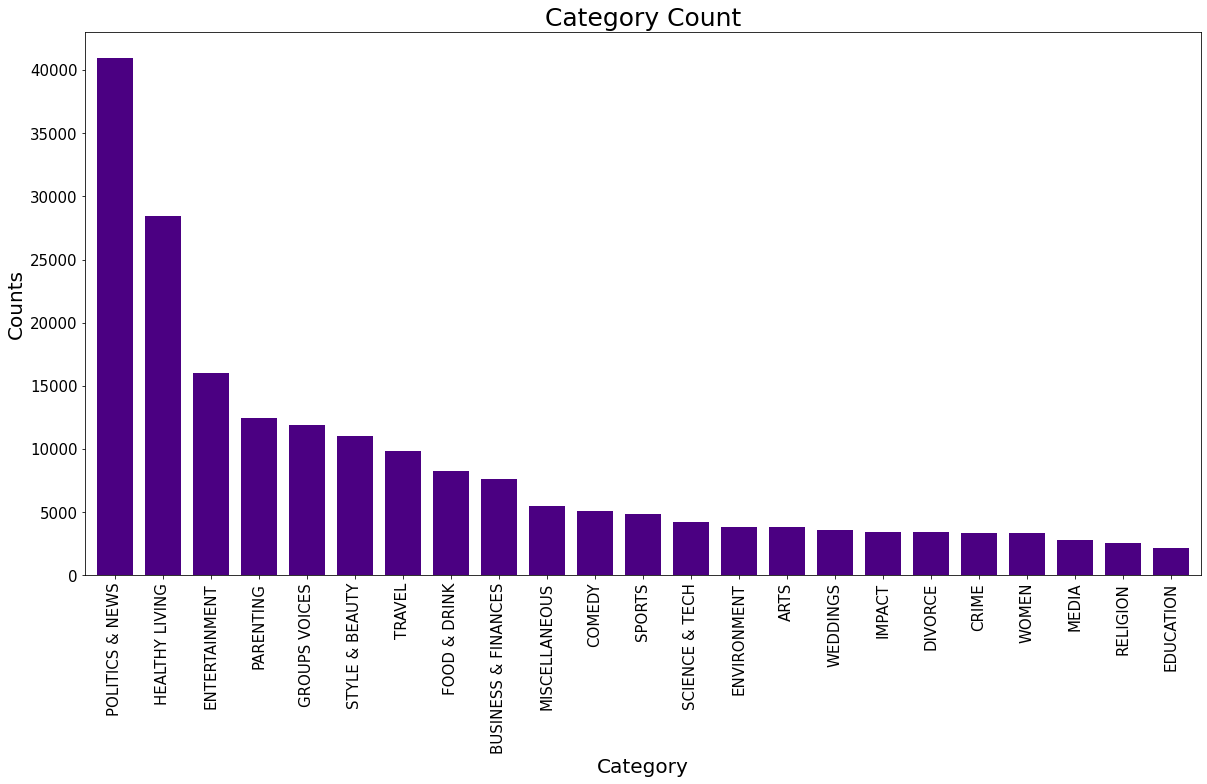

In [23]:
# Barcharts: set up the figure size 
# This barchart shows the count of topics for each category.
# Creating a separate dataframe for the categories in the training set
# We can see that the Top 3 categories include Politics,Wellness and Entertainment and those are by far more than the rest.
# %matplotlib inline 

import matplotlib.pyplot as plt

# In the X axis we are showing article categories
# The Y axis shows the corresponding counts 
width = 0.75 # the width of the bars

# df_catg = data.groupby(['category'])['category'].count()
df_catg = data.groupby('category')['headline'].count().sort_values(ascending=False)
ax = df_catg.plot(kind='bar', figsize=(20,10), color="indigo",width = width)

plt.xticks(rotation=90)
ax.set_title('Category Count', fontsize=25) 
ax.set_xlabel('Category', fontsize=20)
ax.set_ylabel('Counts', fontsize=20)
ax.tick_params(axis='both', labelsize=15)

plt.show()

<AxesSubplot:ylabel='category'>

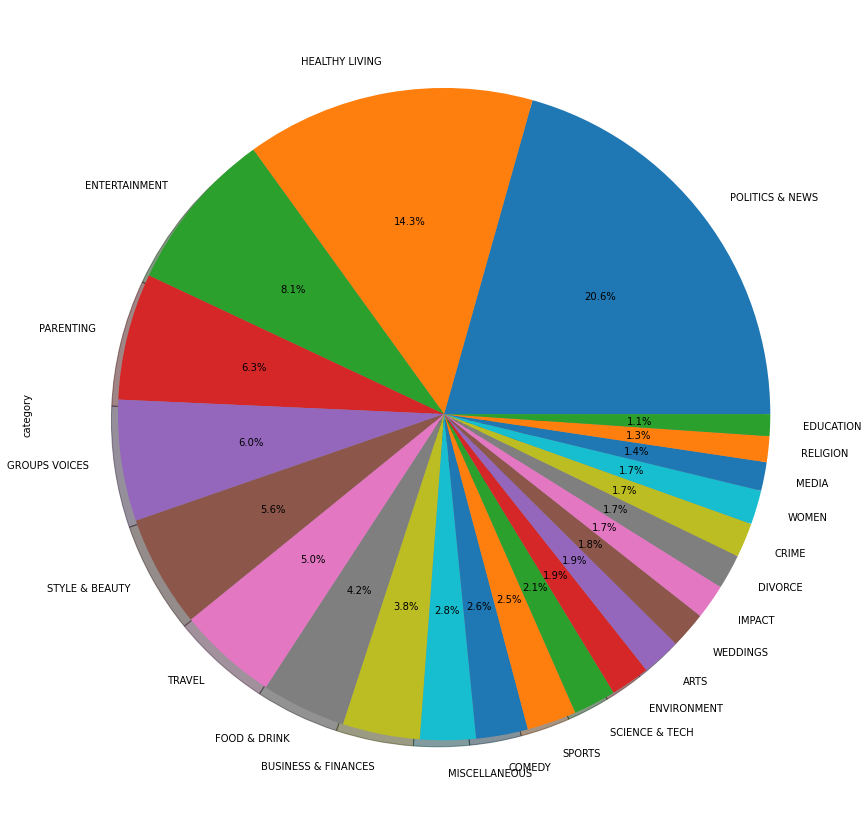

In [24]:
# Showing the same data in a pie chart with the percentages 
# The below pie chart shows that over a period of 7 years (2012 to 2018) almost half (50%) of the news items were covered by
# Politics & NEWS,Healthy Living,Entertainment,Parenting and Gropus Voices
fig, ax = plt.subplots(1, 1, figsize=(15,15))
data['category'].value_counts().plot.pie( shadow=True, autopct = '%1.1f%%')

In [25]:
# Breaking down the date column to Year and month separate columns for easy analysis
# the date column is having the data in the datetime format

data['year'] = data['date'].apply(lambda x: x.year)
# data['month'] = df_all['date'].apply(lambda x: x.month)


# Now subsetting the main dataset
# Subsetting the dataset by category and year

subset_bycatgyear = data[['category','year']]
# This is an array of the years in the dataset
# years = subset_bycatgyear['year'].unique()

year_grp = subset_bycatgyear.groupby(['year'])

Text(0, 0.5, 'Counts')

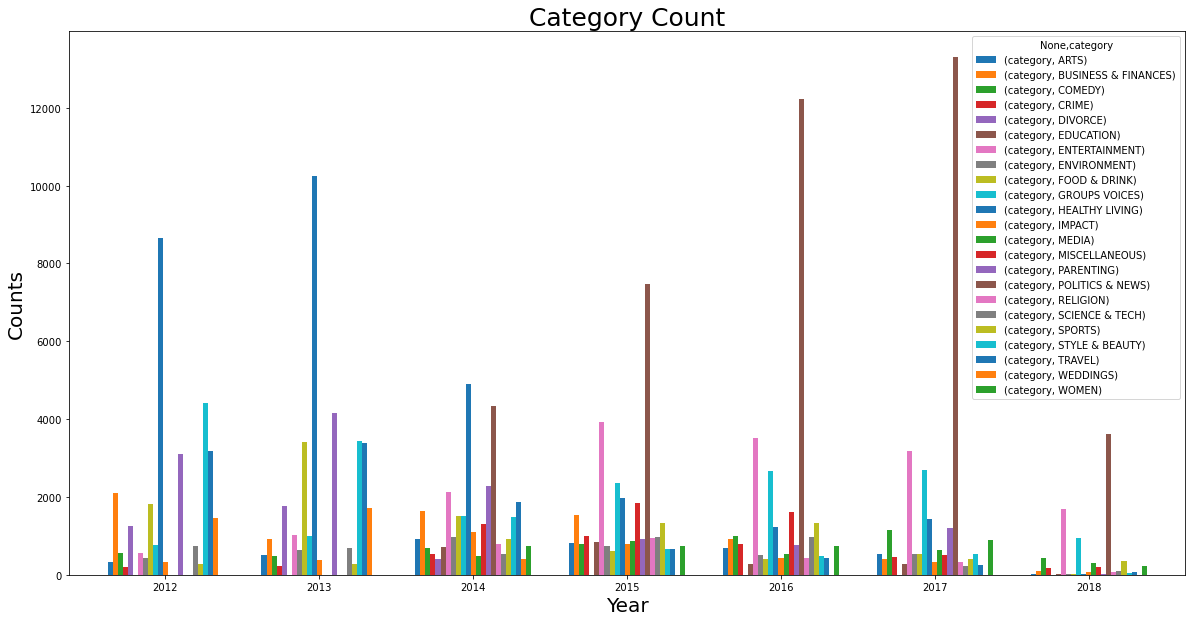

In [26]:
# Grouped barcharts: set up the figure size 
# This barchart shows the count of topics for each category.
# We can see that the Top 3 categories include Politics,Wellness and Entertainment and those are by far more than the rest.
# %matplotlib inline 

# In the X axis we are showing article categories
# The Y axis shows the corresponding counts 
width = 0.75 # the width of the bars
plt.rcParams['figure.figsize'] = (20, 10)

# Get the data
# df = subset_bycatgyear.groupby(['year','category'])['category'].count()
df = pd.DataFrame(year_grp['category'].value_counts())
df1 = df.unstack(level=1)

ax = df1.plot(kind='bar', width = width)

# Define the bar


# make the bar plot
plt.xticks(rotation=0)
ax.set_title('Category Count', fontsize=25) 
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Counts', fontsize=20)

In [27]:
# do specific authors write for a specific categories?
t = data[['category', 'authors']].groupby(['authors'])
t.head()

,category,authors
0,CRIME,Melissa Jeltsen
1,ENTERTAINMENT,Andy McDonald
2,ENTERTAINMENT,Ron Dicker
3,ENTERTAINMENT,Ron Dicker
4,ENTERTAINMENT,Ron Dicker
...,...,...
200836,BUSINESS & FINANCES,"Peter S. Goodman, Contributor\nExecutive Busin..."
200837,BUSINESS & FINANCES,"Ernan Roman, Contributor\nPresident"
200838,ENTERTAINMENT,"Courtney Garcia, Contributor\nI tell stories a..."
200843,SCIENCE & TECH,"Mateo Gutierrez, Contributor\nArtist"


In [28]:
# Make text corpus
# Getting the data for analysis
# getting the features relevant for modeling
text_corpus = pd.DataFrame({
    'headlines':data.headline,
    'text': data.short_description,
    'author': data.authors,
    'label':data.category
})

text_corpus.head()

,headlines,text,author,label
0,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...,Melissa Jeltsen,CRIME
1,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.,Andy McDonald,ENTERTAINMENT
2,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...,Ron Dicker,ENTERTAINMENT
3,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...,Ron Dicker,ENTERTAINMENT
4,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ...",Ron Dicker,ENTERTAINMENT


In [29]:
# Some analysis on author to see if "authors" has any relationship with category
#count the number of author in the dataset
#news.authors.value_counts()
total_authors = data.authors.nunique()
news_counts = data.shape[0]
print('Total Number of authors : ', total_authors)
print('avg articles written by per author: ' + str(news_counts//total_authors))
print('Total news counts : ' + str(news_counts))

Total Number of authors :  27893
avg articles written by per author: 7
Total news counts : 198627


In [30]:
authors_news_counts = data.authors.value_counts()
sum_contribution = 0
author_count = 0
for author_contribution in authors_news_counts:
    author_count += 1
    if author_contribution < 80:
        break
    sum_contribution += author_contribution
print('{} of news is contributed by {} authors i.e  {} % of news is contributed by {} % of authors'.
      format(sum_contribution, author_count, format((sum_contribution*100/news_counts), '.2f'), format((author_count*100/total_authors), '.2f')))
print('We can observe that ~1% of authors are contributing to ~57% of the news. If all authors are writing only of few categories of news then we can consider the author feature as well for modeling.')

114722 of news is contributed by 254 authors i.e  57.76 % of news is contributed by 0.91 % of authors
We can observe that ~1% of authors are contributing to ~57% of the news. If all authors are writing only of few categories of news then we can consider the author feature as well for modeling.


In [31]:
# check for empty strings
print(text_corpus.text.apply(len).value_counts().sort_index())
# There are 5 rows with an empty string (length = 0). They can be removed.

0       19554
1          68
2          23
3          88
4         150
        ...  
1153        1
1172        1
1176        1
1290        1
1392        1
Name: text, Length: 587, dtype: int64


In [32]:
# remove rows with empty text corpus
text_corpus = text_corpus[text_corpus.text.apply(len) > 0]

In [33]:
text_corpus.head()

,headlines,text,author,label
0,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...,Melissa Jeltsen,CRIME
1,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.,Andy McDonald,ENTERTAINMENT
2,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...,Ron Dicker,ENTERTAINMENT
3,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...,Ron Dicker,ENTERTAINMENT
4,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ...",Ron Dicker,ENTERTAINMENT


In [34]:
# Encoding the label
encoder = LabelEncoder()
text_corpus.label = encoder.fit_transform(text_corpus.label)

text_corpus.head()

,headlines,text,author,label
0,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...,Melissa Jeltsen,3
1,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.,Andy McDonald,6
2,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...,Ron Dicker,6
3,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...,Ron Dicker,6
4,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ...",Ron Dicker,6


In [35]:
#Convert text to lowercase and romove punctuation
#define a function to clean the text
#import regular expressions library
import re

def clean_text(text):
    """
    Remove punctuations and special characters, makes lower case
    Args: text
    Output: text
    """
    text=text.lower() #makes text lowercase
    text=re.sub('\\d|\\W+|_',' ',text) #removes extra white space
    text=re.sub('[^a-zA-Z]'," ", text) #removes any non-alphabetic characters
    return text

In [36]:
#import word tokenizer from NLTK
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def tokenize_and_remove_stop_words(txt):
    """
    takes in a sentence, tokenizes the words into a list,
    and then removes stop words from the tokenized list
    """
    stop_words = stopwords.words('english')
    txt_token = word_tokenize(txt)
    txt_no_stopwords = [word for word in txt_token if word not in stop_words]
    return txt_no_stopwords

In [37]:
#Apply NLTK's PorterStemmer
#define a function to stem the words
from nltk.stem.porter import PorterStemmer

def stem_text(word_list):

    porter = PorterStemmer()
    return [porter.stem(word) for word in word_list]

In [38]:
## Applying the cleaning function for the text corpus
'''
Text Preprocessing
===================
Before text can be fed to a model the data needs to be preprocessed. This process involves e.g. tokenization and lemmatization. Tokens can be on     different levels, like word or character. Let's consider each word to be a token.
In languages there exist different word forms like plural or singualr. Stemming or Lemmatization takes care of this and normallizes the tokens.
'''
#apply text cleaning function
text_corpus['clean_desc'] = text_corpus['text'].apply(clean_text)
#apply tokenizing
text_corpus['tokenized_desc'] = text_corpus['clean_desc'].apply(tokenize_and_remove_stop_words)
#apply PorterStemmer function
text_corpus['txt_stemmed_desc'] = text_corpus['tokenized_desc'].apply(stem_text)
#put the text back together (untokenize)
text_corpus['final_desc'] = text_corpus['txt_stemmed_desc'].apply(lambda text: ' '.join(text))
#view the pre-processed text
print('Show the dimension of the new dataframe: ', text_corpus.shape)
text_corpus.info()

Show the dimension of the new dataframe:  (179073, 8)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 179073 entries, 0 to 200852
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   headlines         179073 non-null  object
 1   text              179073 non-null  object
 2   author            179073 non-null  object
 3   label             179073 non-null  int64 
 4   clean_desc        179073 non-null  object
 5   tokenized_desc    179073 non-null  object
 6   txt_stemmed_desc  179073 non-null  object
 7   final_desc        179073 non-null  object
dtypes: int64(1), object(7)
memory usage: 12.3+ MB


## Model Selection & Evaluation

In [39]:
# make sure that after cleaning the text there are no empty strings
text_corpus = text_corpus[text_corpus.final_desc.apply(len) > 0]

In [40]:
text_corpus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178597 entries, 0 to 200852
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   headlines         178597 non-null  object
 1   text              178597 non-null  object
 2   author            178597 non-null  object
 3   label             178597 non-null  int64 
 4   clean_desc        178597 non-null  object
 5   tokenized_desc    178597 non-null  object
 6   txt_stemmed_desc  178597 non-null  object
 7   final_desc        178597 non-null  object
dtypes: int64(1), object(7)
memory usage: 12.3+ MB


In [41]:
# Applying the Neural Network using SCikit Learn
# Using sample data set for the model creation
# Get the target name
from sklearn.model_selection import train_test_split
# Creating the features from the data set
features, category = text_corpus.final_desc, text_corpus.label
# Make test and training split (20:80)
features_train,features_test,target_train, target_test = train_test_split(features,category, random_state=1000, test_size = 0.2)

print('Features-Training Set: ',len(features_train))
print('Features-Test Set: ',len(features_test))
print('Target: Training Set: ',len(target_train))
print('Target: Test Set: ',len(target_test))

Features-Training Set:  142877
Features-Test Set:  35720
Target: Training Set:  142877
Target: Test Set:  35720


### Naive Bayes Classifier

In [44]:
# Train the first model
# 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer


from sklearn.naive_bayes import MultinomialNB

classifier = Pipeline([('vect', CountVectorizer()),
                       ('tfidf', TfidfTransformer()),
                       ('clf', MultinomialNB())
])

text_clf_NB = classifier.fit(features_train, target_train)

In [49]:
# Performance of NB Classifier
# Using the Test Set
import numpy as np
predicted = text_clf_NB.predict(features_test)
np.mean(predicted == target_test)
print("Predictability of the Naive Bayes Classifier is around 41% = ({})".format(np.mean(predicted == target_test)))

Predictability of the Naive Bayes Classifier is around 41% = (0.41215005599104143)


In [50]:
# Saving the Model

import joblib
from joblib import dump, load

model_path="/home/arindam/Documents/mygithub/bu_dsc/models"
model_name="news_classify_NB_sklearn.pkl"
filename = model_path + "/" + model_name 
# print(filename)
joblib.dump(text_clf_NB, filename)

['/home/arindam/Documents/mygithub/bu_dsc/models/news_classify_NB_sklearn.pkl']

In [51]:
# Load a saved model Naive Bayes Model
# Evaluating the models efficacy

news_catg = open(filename,'rb')
classifier = joblib.load(news_catg)

# Predicting the test set for the classifier
y_pred = classifier.predict(features_test)
np.mean(y_pred == target_test)
y_pred

array([15, 10, 15, ..., 10, 15, 15])

In [52]:
# features_test.shape
# target_test.shape

y_pred_series = pd.Series(y_pred)
data_series = {"featues": features_test,
               "actual_values": target_test,
               "predicted": y_pred_series}

df_data_series = pd.concat(data_series, axis = 1)

df_data_series

,featues,actual_values,predicted
0,NaN,NaN,15.0
1,NaN,NaN,10.0
2,NaN,NaN,15.0
3,NaN,NaN,15.0
4,dietland actress said use bag realli cathart t...,6.0,15.0
...,...,...,...
200840,amid cheer occasion go theater speaker duo dan...,0.0,NaN
200844,part teen experi googl like adult special safe...,17.0,NaN
200845,web war threaten rage consider time yet partic...,17.0,NaN
200850,lead super bowl xlvi talk game could end one o...,18.0,NaN


### Linear Support Vector Classification

In [53]:
# Using Linear Support Vector Classification
# This class supports both dense and sparse input and the multiclass support is handled according to a one-vs-the-rest scheme.

from sklearn.svm import LinearSVC

classifier = Pipeline([('vect', CountVectorizer()),
                       ('tfidf', TfidfTransformer()),
                       ('clf', LinearSVC())
])

text_clf_SVC = classifier.fit(features_train, target_train)

In [54]:
# Accuracy of the Naive Bayes model
from sklearn.metrics import accuracy_score ,confusion_matrix
Y_predict = text_clf_NB.predict(features_test)
accuracy = accuracy_score(target_test,Y_predict)*100
print(format(accuracy, '.2f'))

41.22


In [55]:
# from sklearn.svm import LinearSVC
# model = LinearSVC()
# model.fit(X_train,Y_train)
Y_predict = text_clf_SVC.predict(features_test)
accuracy = accuracy_score(target_test,Y_predict)*100
print(format(accuracy, '.2f'))

54.52


### NLP using Neural Network

In [56]:
# Training a multiclass Classifier
# Using Keras to construct a feedforward neural network with an output layer with soft-max activation functions
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

number_of_features = 5000

# Convert the feature data to a one-hot encoded feature matrix
tokenizer = Tokenizer(num_words=number_of_features)
tokenizer.fit_on_texts(features_train)

sequence_train = tokenizer.texts_to_sequences(features_train)
sequence_test = tokenizer.texts_to_sequences(features_test)

X_train = tokenizer.sequences_to_matrix(sequence_train, mode='binary')
X_test = tokenizer.sequences_to_matrix(sequence_test, mode="binary")


# Convert the target vector
# target_train = to_categorical(target_train)
# target_test = to_categorical(target_test)

In [57]:
# Start Neural Network
# rerunning the .fit method will start off with the computed weights from the previous training
from keras.backend import clear_session
clear_session()

# input_dim = X_train.shape[1] # Number of features
network = models.Sequential()

# Adding fully connected input layer with a ReLU activation function
network.add(layers.Dense(units=100,
                         activation='relu',
                         input_shape=(number_of_features,)))
# Add fully connected layer with ReLU activation function
network.add(layers.Dense(units=100, activation="relu"))

# Add fully connected layer with a softmax activation function
network.add(layers.Dense(units=23, activation="softmax"))

# Compile neural network
network.compile(loss="sparse_categorical_crossentropy", # Cross-entropy
                optimizer="adam", # Root Mean Square Propagation
                metrics=["accuracy"]) # Accuracy performance metric

network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               500100    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 23)                2323      
Total params: 512,523
Trainable params: 512,523
Non-trainable params: 0
_________________________________________________________________


In [59]:
# Train neural network
history = network.fit(X_train, # Features
                      target_train, # Target
                      epochs=3, # Three epochs
                      verbose=1, # show output
                      batch_size=100, # Number of observations per batch
                      validation_data=(X_test, target_test)) # Test data  

Epoch 1/3
1429/1429 [==============================] - 216s 151ms/step - loss: 1.8462 - accuracy: 0.4877 - val_loss: 1.6379 - val_accuracy: 0.5366
Epoch 2/3
1429/1429 [==============================] - 199s 139ms/step - loss: 1.4819 - accuracy: 0.5702 - val_loss: 1.6341 - val_accuracy: 0.5371
Epoch 3/3
1429/1429 [==============================] - 236s 165ms/step - loss: 1.3337 - accuracy: 0.6029 - val_loss: 1.6794 - val_accuracy: 0.5340


In [60]:
# Evaluating the model

loss, accuracy = network.evaluate(X_train, target_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = network.evaluate(X_test, target_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.6690
Testing Accuracy:  0.5340


## Summary and Conclusion


### Why should someone in the business care about this solution?
### How would you pitch this business problem to a group of stakeholders to gain buy-in to proceed?

In [ ]:
'''
The internet is full of information and a large part of it is text. Texts take more time for humans to process. NLP techniques use statistical and computation driven methods to analyze large bodies of text. One of the most common forms of text online is a news article. This model would be helpful for an online program to analyse and classify news items as they appear on the internet from various sources.
The news gathering website or blog could easily identify the news items as they appear in the internet through the social media or other streaming sites.
'''

### What does the analysis/model building tell you?

In [ ]:
'''
In my analysis, in order to generate the text summaries, I used the NLTK sentence and word tokenizer and for removing stop words(i.e, common words). Then, I tokenize at the sentence and headline levels. Then filter out the stopwords and calculate the frequency of every non-stop word. I then score a sentence by the word frequency. Since this method filters for the most salient sentences and does not create new sentence structures or introduce new words or phrases it is an extractive rather than an absractive method.  
This analysis provides insights into common NLP techniques and tools for a large unexplored dataset. It shows what kind of accuracy to expect from a dataset in which the text was well edited but large and shows that decent accuracy could be achieved for topics.
The very first model I built was the multinomial Naive Bayes classifier. It is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. Predictability of the Naive Bayes Classifier is around 41%

Next I trained a model with Linear Support Vector Classification. The accuracy of this model is little better at 54.52%

Finally using the NLP using Neural Network. The Test accuracy is now about 60% and this is by far the best accuracy so far.
'''

### What are some of the potential challenges or additional opportunities that need to be explored?
### What are your recommendations?

In [ ]:
'''
This analysis focused on supervised learning with handcrafted labels as given by the HuffPost. However there could be an unsupervised learning done which will provide insights into trends within data. This project was built entirely on the articles from HuffPost. This could be be expanded to include articles from other news sources. 

I have used some simple ML models but more advanced Neural networks and architectures could be used.

I have used English texts only, but this could also be applied to other languages also. 
Some additional opportunities are:

    Can you categorize news articles based on their headlines and short descriptions?

    Do news articles from different categories have different writing styles?

    A classifier trained on this dataset could be used on a free text to identify the type of language being used.

The progress of NLP research on text classification has arrived at the state-of-the-art(SOTA).It has achieved terrific results, showing Deep Learning Methods as the cutting edge technology to perform such tasks. Hence we need to assess the performance of the SOTA Deep learning models to text classification is essential not only for academics but also for AI practitioners. So we should work more on the feedforward,recurrent, convolutional and ensemble-based neural networks.
We should work more to properly fine tune the hyper parameters and use various NLP techniques.
'''

### Acknowledgements

In [ ]:
'''
This dataset contains around 200k news headlines from the year 2012 to 2018 obtained from HuffPost. The model trained on this dataset could be used to identify tags for untracked news articles or to identify the type of language used in different news articles.
The data set was prepared by https://rishabhmisra.github.io/publications/
I collected it from kaggle website.
@dataset{dataset,
author = {Misra, Rishabh},
year = {2018},
month = {06},
pages = {},
title = {News Category Dataset},
doi = {10.13140/RG.2.2.20331.18729}
}
'''